<a href="https://colab.research.google.com/github/vikpy/EconometricsSem3/blob/master/Lecture_9_VAR_Multivariate_analysis_cointegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import statsmodels.api as sample_data
import statsmodels.tsa.stattools as sts
from matplotlib.pyplot import figure


**Multivariate Time Series**

**Modeling Causality**

In [ ]:
mydata = pd.read_csv("stockmarketindex.csv", na_values=["null"], index_col="Date", parse_dates=True,
                     infer_datetime_format=True)
mydata.head()

,asi,his,nky,sti,sensex
Date,,,,,
15-05-2009,4075.65,2019.66,136.57,1540.10,224.85
16-05-2009,3955.57,1994.27,141.07,1539.52,223.01
17-05-2009,3961.92,2002.47,141.65,1546.77,222.40
18-05-2009,3935.97,2000.80,143.67,1541.34,220.43
19-05-2009,3892.94,2001.04,140.71,1541.21,225.57


In [ ]:
mydata.tail()

,asi,his,nky,sti,sensex
Date,,,,,
25-07-2020,4543.94,3419.74,180.95,2411.67,495.76
26-07-2020,4590.77,3438.82,179.62,2432.56,497.42
27-07-2020,4614.39,3438.96,178.75,2430.66,500.75
28-07-2020,4646.53,3448.72,178.78,2444.96,500.13
31-07-2020,4593.26,3474.12,180.38,2451.13,503.38


In [ ]:
sts.adfuller(mydata.asi)

(-2.568738812806987,
 0.09963196476676572,
 1,
 2837,
 {'1%': -3.432657094354157,
  '10%': -2.5673126119599647,
  '5%': -2.862559315261322},
 31376.531892318148)

In [ ]:
sts.adfuller(mydata.his)

(-2.702804038313093,
 0.07355430358016592,
 0,
 2838,
 {'1%': -3.4326562806874334,
  '10%': -2.567312420641838,
  '5%': -2.8625589559080318},
 28795.21937969294)

In [ ]:
sts.adfuller(mydata.nky)

(-1.200699489315211,
 0.6732947369284324,
 2,
 2836,
 {'1%': -3.432657908595214,
  '10%': -2.567312803413099,
  '5%': -2.8625596748681668},
 11345.276195531438)

In [ ]:
sts.adfuller(mydata.sensex)

(-2.3274070757162004,
 0.16328092342022704,
 1,
 2837,
 {'1%': -3.432657094354157,
  '10%': -2.5673126119599647,
  '5%': -2.862559315261322},
 17808.954665700272)

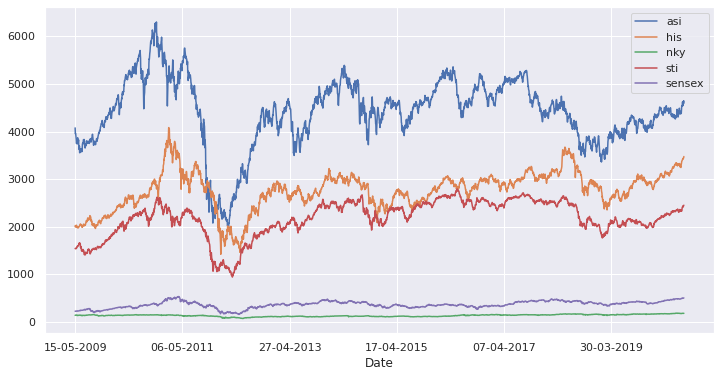

In [ ]:
mydata.plot(figsize=(12,6))
plt.show()

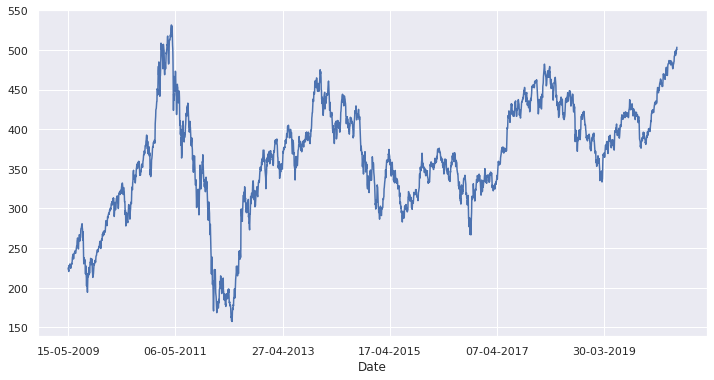

In [ ]:
mydata.sensex.plot(figsize=(12,6))
plt.show()

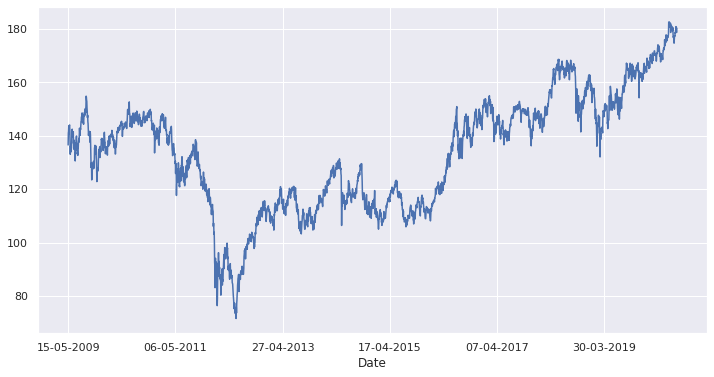

In [ ]:
mydata.nky.plot(figsize=(12,6))
plt.show()

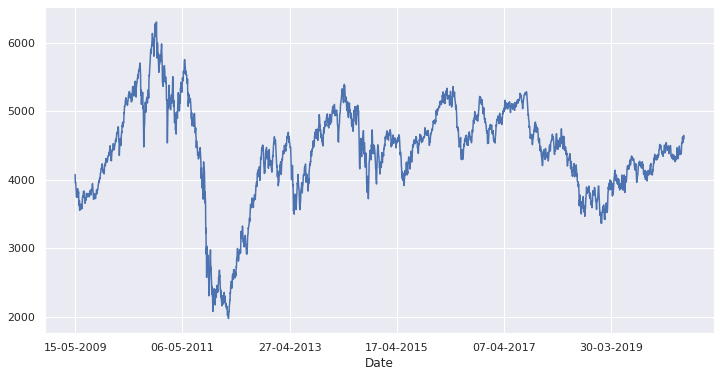

In [ ]:
mydata.asi.plot(figsize=(12,6))
plt.show()

Convert the data set to 1st difference

In [ ]:
mydatadiff = mydata.diff().dropna()

In [ ]:
mydatadiff.head()

,asi,his,nky,sti,sensex
Date,,,,,
16-05-2009,-120.08,-25.39,4.50,-0.58,-1.84
17-05-2009,6.35,8.20,0.58,7.25,-0.61
18-05-2009,-25.95,-1.67,2.02,-5.43,-1.97
19-05-2009,-43.03,0.24,-2.96,-0.13,5.14
22-05-2009,-59.59,29.87,2.75,-1.55,2.48


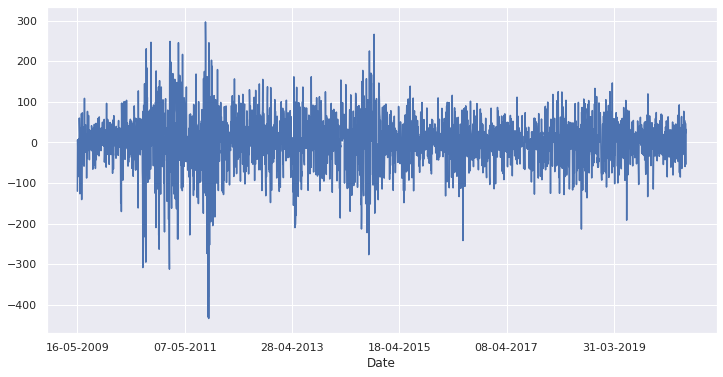

In [ ]:
mydatadiff.asi.plot(figsize=(12,6))
plt.show()

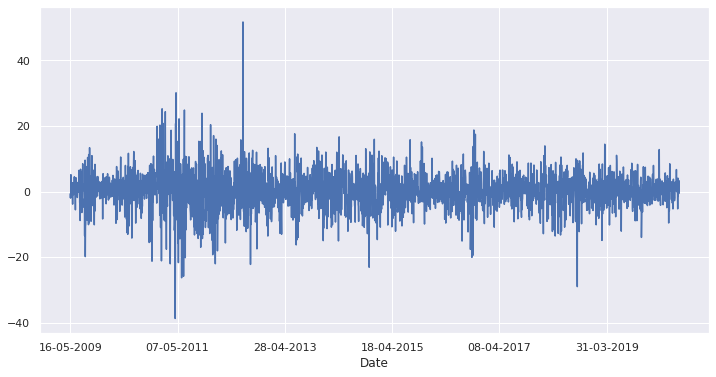

In [ ]:
mydatadiff.sensex.plot(figsize=(12,6))
plt.show()

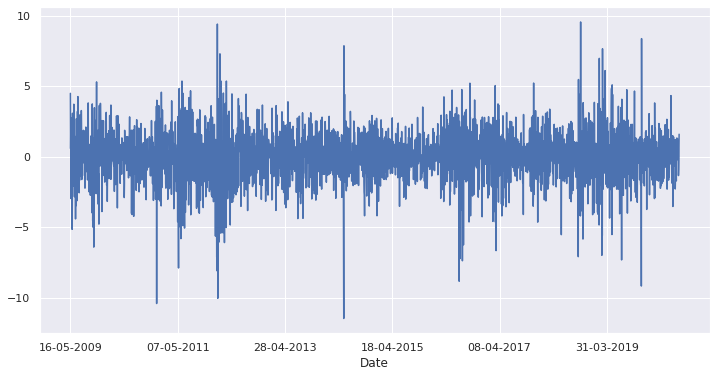

In [ ]:
mydatadiff.nky.plot(figsize=(12,6))
plt.show()

**Granger Causality**

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

**Tesing cause and effect relationship between stock market returns of ASI and HIS**

H0: ASI does not granger cause HIS
H1: ASI causes/impacts  HIS

In [ ]:
grangercausalitytests(mydatadiff[["asi", "his"]], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9517  , p=0.3294  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.9527  , p=0.3290  , df=1
likelihood ratio test: chi2=0.9525  , p=0.3291  , df=1
parameter F test:         F=0.9517  , p=0.3294  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4981  , p=0.6077  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.9979  , p=0.6072  , df=2
likelihood ratio test: chi2=0.9978  , p=0.6072  , df=2
parameter F test:         F=0.4981  , p=0.6077  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2567  , p=0.2876  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=3.7794  , p=0.2863  , df=3
likelihood ratio test: chi2=3.7769  , p=0.2866  , df=3
parameter F test:         F=1.2567  , p=0.2876  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9918  , p=0.

{1: ({'lrtest': (0.952507739290013, 0.32908179427097395, 1),
   'params_ftest': (0.9516602536742429, 0.3293803139749294, 2834.0, 1.0),
   'ssr_chi2test': (0.9526676569067017, 0.3290411965082914, 1),
   'ssr_ftest': (0.9516602536741604, 0.3293803139749294, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.9977665025071474, 0.6072083804179771, 2),
   'params_ftest': (0.49809131140599816, 0.6077426881559386, 2831.0, 2.0),
   'ssr_chi2test': (0.9979420410802664, 0.6071550885103655, 2),
   'ssr_ftest': (0.49809131140659985, 0.6077426881555565, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (3.7769038931000978, 0.2865840492321026, 3),
   'params_ftest': (1.2566963269497904, 0.28760153865546584, 2828.0, 3.0),
   'ssr_chi2test': (3.779420884266988, 0.2862889184285111, 3),
   'ssr_ftest': (1.2566963269496818, 0.2876015386555178, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [ ]:
grangercausalitytests(mydatadiff[[ "his", "asi"]], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8921  , p=0.0891  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=2.8952  , p=0.0888  , df=1
likelihood ratio test: chi2=2.8937  , p=0.0889  , df=1
parameter F test:         F=2.8921  , p=0.0891  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2738  , p=0.0380  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=6.5591  , p=0.0376  , df=2
likelihood ratio test: chi2=6.5516  , p=0.0378  , df=2
parameter F test:         F=3.2738  , p=0.0380  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1692  , p=0.0896  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=6.5237  , p=0.0887  , df=3
likelihood ratio test: chi2=6.5162  , p=0.0890  , df=3
parameter F test:         F=2.1692  , p=0.0896  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9243  , p=0.

{1: ({'lrtest': (2.893709167285124, 0.08892597918761709, 1),
   'params_ftest': (2.892123916634386, 0.08912321973616268, 2834.0, 1.0),
   'ssr_chi2test': (2.895185445127884, 0.08884455112214716, 1),
   'ssr_ftest': (2.8921239166346218, 0.0891232197361159, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (6.551571194060671, 0.03778717207568714, 2),
   'params_ftest': (3.2737902436670265, 0.038006038098312246, 2831.0, 2.0),
   'ssr_chi2test': (6.5591445644923585, 0.037644354523051995, 2),
   'ssr_ftest': (3.2737902436667605, 0.03800603809832167, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (6.516245213642833, 0.08902402988466462, 3),
   'params_ftest': (2.169210582470354, 0.08961106879602433, 2828.0, 3.0),
   'ssr_chi2test': (6.523739746786677, 0.0887309540639193, 3),
   'ssr_ftest': (2.169210582470632, 0.08961106879600714, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [ ]:
grangercausalitytests(mydatadiff[[ "nky", "sensex"]], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9691  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9691  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9691  , df=1
parameter F test:         F=0.0015  , p=0.9691  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0311  , p=0.9693  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.0624  , p=0.9693  , df=2
likelihood ratio test: chi2=0.0624  , p=0.9693  , df=2
parameter F test:         F=0.0311  , p=0.9693  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1012  , p=0.3473  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=3.3117  , p=0.3460  , df=3
likelihood ratio test: chi2=3.3097  , p=0.3463  , df=3
parameter F test:         F=1.1012  , p=0.3473  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8574  , p=0.

{1: ({'lrtest': (0.0015022380193840945, 0.9690827604224087, 1),
   'params_ftest': (0.0015006498672007515, 0.9691018277908823, 2834.0, 1.0),
   'ssr_chi2test': (0.0015022384153444881, 0.9690827563498607, 1),
   'ssr_ftest': (0.0015006498657336197, 0.9691018278070701, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.06238888130610576, 0.9692870859378532, 2),
   'params_ftest': (0.031139785921484267, 0.9693403955286357, 2831.0, 2.0),
   'ssr_chi2test': (0.06238956755470889, 0.9692867533519559, 2),
   'ssr_ftest': (0.03113978592161158, 0.9693403955286357, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (3.3097353602533985, 0.346289960703124, 3),
   'params_ftest': (1.1011637126157612, 0.3473439676003393, 2828.0, 3.0),
   'ssr_chi2test': (3.311668096109916, 0.3460219618986376, 3),
   'ssr_ftest': (1.101163712615972, 0.3473439676001262, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
   

In [ ]:
grangercausalitytests(mydatadiff[[ "sensex", "nky" ]], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1709  , p=0.6794  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.1711  , p=0.6792  , df=1
likelihood ratio test: chi2=0.1710  , p=0.6792  , df=1
parameter F test:         F=0.1709  , p=0.6794  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7281  , p=0.4829  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=1.4588  , p=0.4822  , df=2
likelihood ratio test: chi2=1.4584  , p=0.4823  , df=2
parameter F test:         F=0.7281  , p=0.4829  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4981  , p=0.6836  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=1.4980  , p=0.6827  , df=3
likelihood ratio test: chi2=1.4976  , p=0.6828  , df=3
parameter F test:         F=0.4981  , p=0.6836  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4038  , p=0.

{1: ({'lrtest': (0.17104870695766294, 0.6791814655387212, 1),
   'params_ftest': (0.17087298173227178, 0.6793683990015051, 2834.0, 1.0),
   'ssr_chi2test': (0.17105386350564966, 0.6791768992576123, 1),
   'ssr_ftest': (0.1708729817324678, 0.6793683990015051, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.4584112045522488, 0.4822919695939277, 2),
   'params_ftest': (0.728107177140992, 0.48291241418658915, 2831.0, 2.0),
   'ssr_chi2test': (1.4587862623600771, 0.48220153438937574, 2),
   'ssr_ftest': (0.7281071771405815, 0.4829124141867409, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.4975999377347762, 0.6828243741550597, 3),
   'params_ftest': (0.4980989364845063, 0.6836174130055037, 2828.0, 3.0),
   'ssr_chi2test': (1.4979955639327722, 0.6827330303611792, 3),
   'ssr_ftest': (0.4980989364846419, 0.6836174130053585, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [ ]:
grangercausalitytests(mydatadiff[[ "sensex", "sti" ]], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2316  , p=0.6304  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.2318  , p=0.6302  , df=1
likelihood ratio test: chi2=0.2318  , p=0.6302  , df=1
parameter F test:         F=0.2316  , p=0.6304  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9166  , p=0.4000  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=1.8364  , p=0.3992  , df=2
likelihood ratio test: chi2=1.8358  , p=0.3994  , df=2
parameter F test:         F=0.9166  , p=0.4000  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6285  , p=0.5966  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=1.8901  , p=0.5955  , df=3
likelihood ratio test: chi2=1.8894  , p=0.5957  , df=3
parameter F test:         F=0.6285  , p=0.5966  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2833  , p=0.

{1: ({'lrtest': (0.2318257884871855, 0.6301733261725089, 1),
   'params_ftest': (0.2315901052107472, 0.6303844408778863, 2834.0, 1.0),
   'ssr_chi2test': (0.23183526058109305, 0.6301663369415296, 1),
   'ssr_ftest': (0.23159010521213175, 0.6303844408767247, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.8357935475323757, 0.39935809884123774, 2),
   'params_ftest': (0.9165751047595503, 0.4000049011661275, 2831.0, 2.0),
   'ssr_chi2test': (1.8363878467665466, 0.39923944736458056, 2),
   'ssr_ftest': (0.916575104759537, 0.40000490116619025, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.8894204809512303, 0.5956719445630199, 3),
   'params_ftest': (0.6284611479520482, 0.5965960230471787, 2828.0, 3.0),
   'ssr_chi2test': (1.8900502345596035, 0.5955376895827016, 3),
   'ssr_ftest': (0.6284611479523291, 0.5965960230469776, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [ ]:
grangercausalitytests(mydatadiff[[ "sti", "sensex" ]], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2926  , p=0.5886  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.2930  , p=0.5883  , df=1
likelihood ratio test: chi2=0.2929  , p=0.5883  , df=1
parameter F test:         F=0.2926  , p=0.5886  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3610  , p=0.6970  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.7234  , p=0.6965  , df=2
likelihood ratio test: chi2=0.7233  , p=0.6965  , df=2
parameter F test:         F=0.3610  , p=0.6970  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2642  , p=0.8512  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=0.7947  , p=0.8507  , df=3
likelihood ratio test: chi2=0.7945  , p=0.8508  , df=3
parameter F test:         F=0.2642  , p=0.8512  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3537  , p=0.

{1: ({'lrtest': (0.2929373569058953, 0.5883443226141276, 1),
   'params_ftest': (0.29264269712026575, 0.5885745001060447, 2834.0, 1.0),
   'ssr_chi2test': (0.292952481202042, 0.588334693638828, 1),
   'ssr_ftest': (0.2926426971189944, 0.5885745001068465, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.7232628608326195, 0.6965390436427581, 2),
   'params_ftest': (0.36103989327848185, 0.6969832797604752, 2831.0, 2.0),
   'ssr_chi2test': (0.7233550952583063, 0.696506921944116, 2),
   'ssr_ftest': (0.3610398932786081, 0.6969832797604752, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (0.7945440529510961, 0.8507715741124994, 3),
   'params_ftest': (0.26423109722740984, 0.8512069542855313, 2828.0, 3.0),
   'ssr_chi2test': (0.7946554037894394, 0.850744958735377, 3),
   'ssr_ftest': (0.26423109722710575, 0.8512069542857563, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

**Vector Auto-Regression Model (VAR)**

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [ ]:
varmodel = VAR(mydatadiff)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


**Selecting an optimum Lag Order for VAR**

In [ ]:
optlag_var = varmodel.select_order(12)
optlag_var.summary()

,AIC,BIC,FPE,HQIC
0,26.90,26.91,4.794e+11,26.90
1,26.84,26.90*,4.524e+11,26.86*
2,26.84,26.96,4.539e+11,26.88
3,26.83,27.00,4.502e+11,26.89
4,26.83,27.05,4.473e+11,26.91
5,26.82,27.10,4.451e+11,26.92
6,26.83,27.16,4.484e+11,26.95
7,26.82*,27.20,4.451e+11*,26.96
8,26.83,27.26,4.482e+11,26.98
9,26.84,27.32,4.520e+11,27.01


**Fit the VAR Model**

In [ ]:
varresult = varmodel.fit(maxlags=12, ic = "aic")
varresult.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 10, Oct, 2020
Time:                     04:29:29
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    27.1991
Nobs:                     2831.00    HQIC:                   26.9573
Log likelihood:          -57870.1    FPE:                4.44809e+11
AIC:                      26.8209    Det(Omega_mle):     4.17575e+11
--------------------------------------------------------------------
Results for equation asi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.382102         1.208548            0.316           0.752
L1.asi            0.063876         0.018902            3.379           0.001
L1.his           -0.040089         0.030738           -1.304           0.192
L

In [ ]:
varresult1 = varmodel.fit(maxlags=12, ic = "bic")
varresult1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 10, Oct, 2020
Time:                     04:34:45
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    26.8935
Nobs:                     2837.00    HQIC:                   26.8532
Log likelihood:          -58156.7    FPE:                4.49107e+11
AIC:                      26.8305    Det(Omega_mle):     4.44388e+11
--------------------------------------------------------------------
Results for equation asi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.218102         1.208334            0.180           0.857
L1.asi            0.059786         0.018752            3.188           0.001
L1.his           -0.031884         0.029993           -1.063           0.288
L

**An Alternate Approach of VAR**

In [ ]:
import statsmodels.tsa.api as smt

In [ ]:
vmodel = smt.VAR(mydatadiff)
result = vmodel.fit(maxlags = 15, ic = "aic")
print(result.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 10, Oct, 2020
Time:                     04:43:57
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    27.1991
Nobs:                     2831.00    HQIC:                   26.9573
Log likelihood:          -57870.1    FPE:                4.44809e+11
AIC:                      26.8209    Det(Omega_mle):     4.17575e+11
--------------------------------------------------------------------
Results for equation asi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.382102         1.208548            0.316           0.752
L1.asi            0.063876         0.018902            3.379           0.001
L1.his           -0.040089         0.030738           -1.304           0.192
L

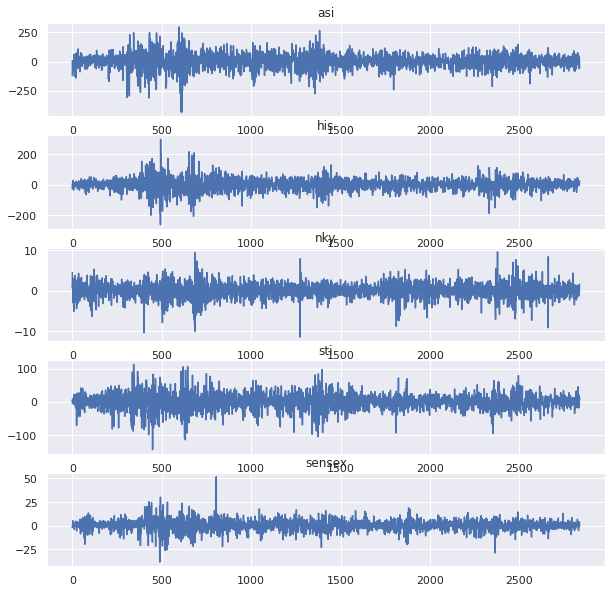

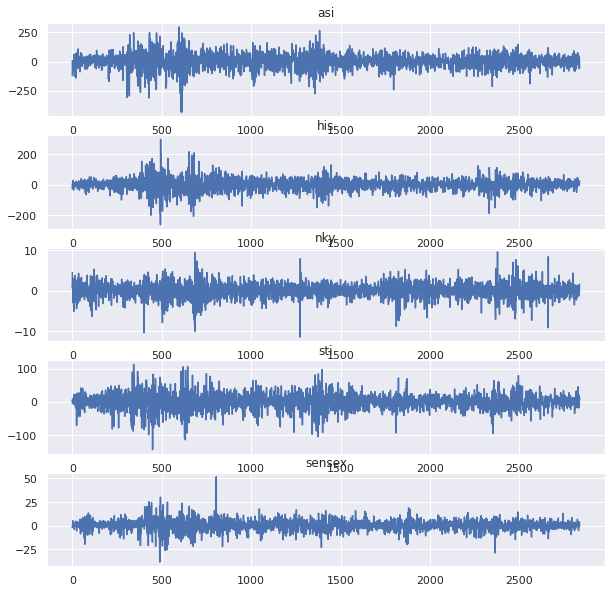

In [ ]:
result.plot()

<Figure size 864x576 with 0 Axes>

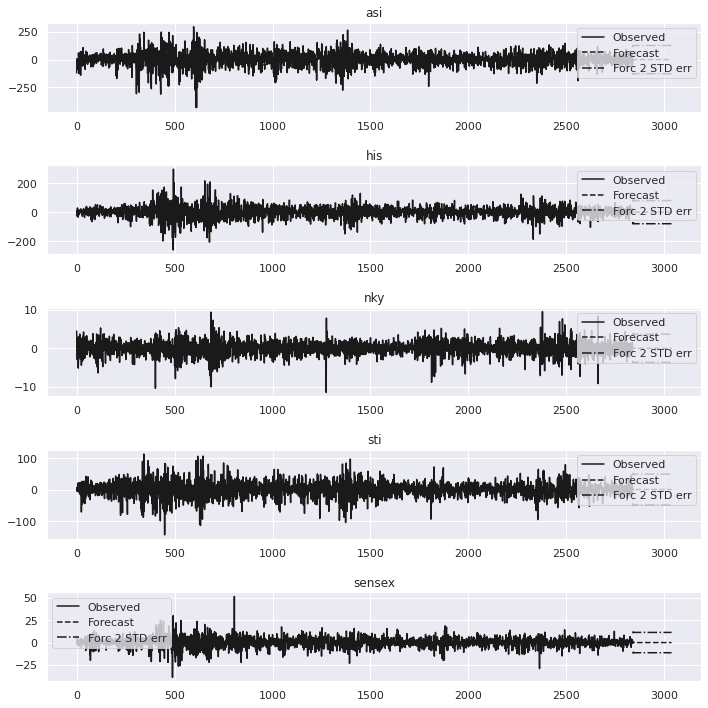

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
result.plot_forecast(200)
plt.legend(loc="best")
plt.tight_layout(h_pad= 1.5)
plt.show()

In [ ]:
varfcast = result.forecast(mydatadiff.values, 25)
pd.DataFrame(varfcast, columns=mydatadiff.columns).head()

,asi,his,nky,sti,sensex
0,3.671574,1.567376,-0.171666,1.128834,0.453976
1,-5.773482,5.563131,0.170434,2.898637,0.473405
2,2.091633,-2.298522,-0.009216,-0.142581,-0.087525
3,-4.216360,4.242340,0.238794,2.139462,0.300114
4,-1.999875,2.726442,-0.030547,-1.484301,0.102100


In [ ]:
asivalues = pd.DataFrame(varfcast)[0]
asivalues.head()

0    3.671574
1   -5.773482
2    2.091633
3   -4.216360
4   -1.999875
Name: 0, dtype: float64

In [ ]:
mydata.tail(2)

,asi,his,nky,sti,sensex
Date,,,,,
28-07-2020,4646.53,3448.72,178.78,2444.96,500.13
31-07-2020,4593.26,3474.12,180.38,2451.13,503.38


In [ ]:
asi_level = np.cumsum(asivalues)+ 4593.26

In [ ]:
asi_level

0     4596.931574
1     4591.158091
2     4593.249724
3     4589.033365
4     4587.033490
5     4587.492491
6     4587.116819
7     4587.960084
8     4587.445825
9     4588.070383
10    4588.217036
11    4588.336700
12    4588.522979
13    4588.573191
14    4588.865897
15    4589.070466
16    4589.393966
17    4589.641754
18    4589.946052
19    4590.232098
20    4590.515539
21    4590.801747
22    4591.084946
23    4591.374736
24    4591.655611
Name: 0, dtype: float64

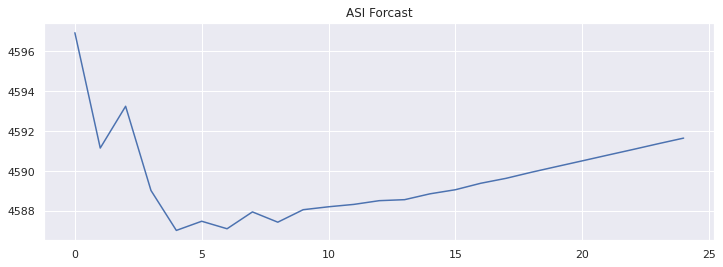

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(asi_level)
plt.title("ASI Forcast")
plt.grid
plt.show()

**Plotting time series autocorrelation functions of the Residuals** 

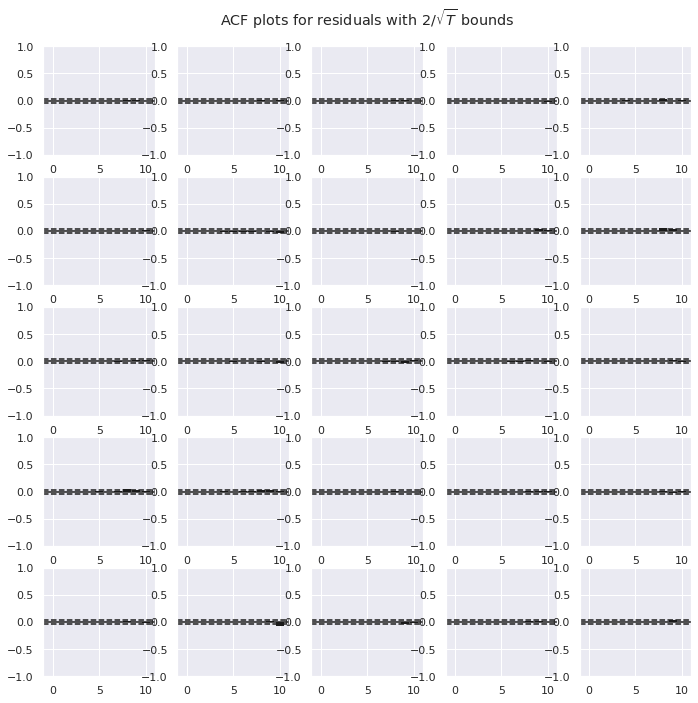

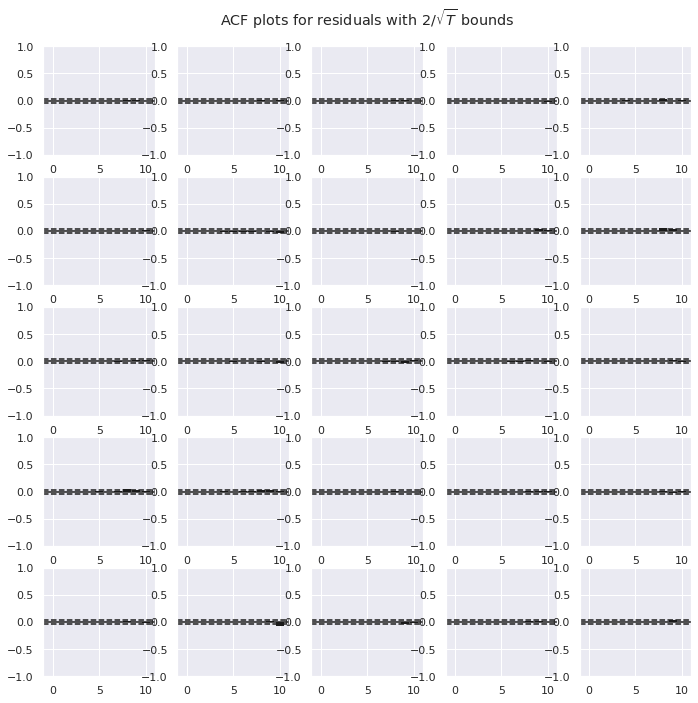

In [ ]:
result.plot_acorr()

**Impulse Response Function**

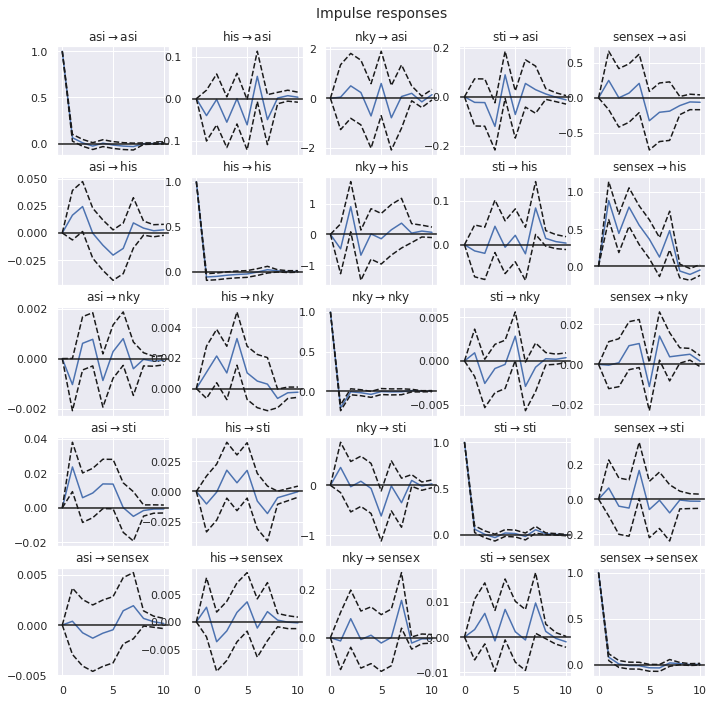

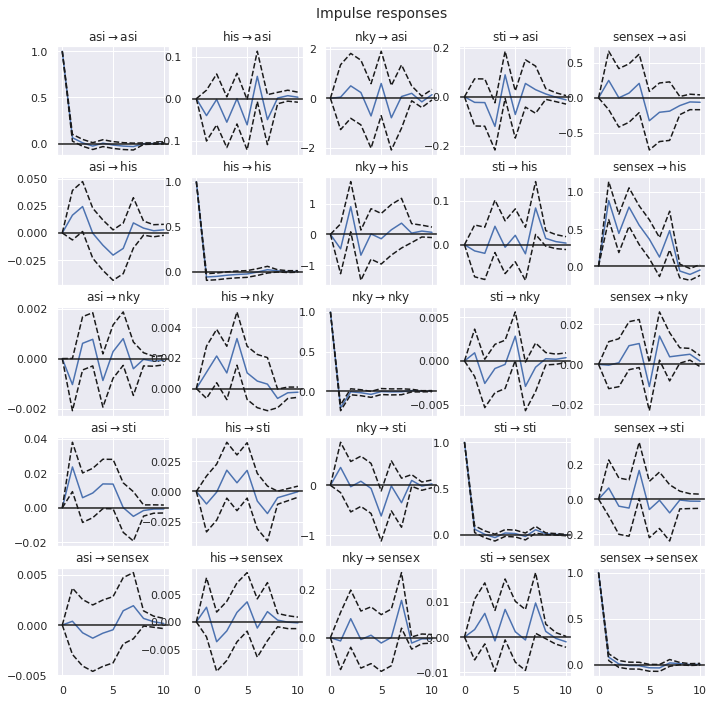

In [ ]:
irf = result.irf(10)
irf.plot(orth = False)

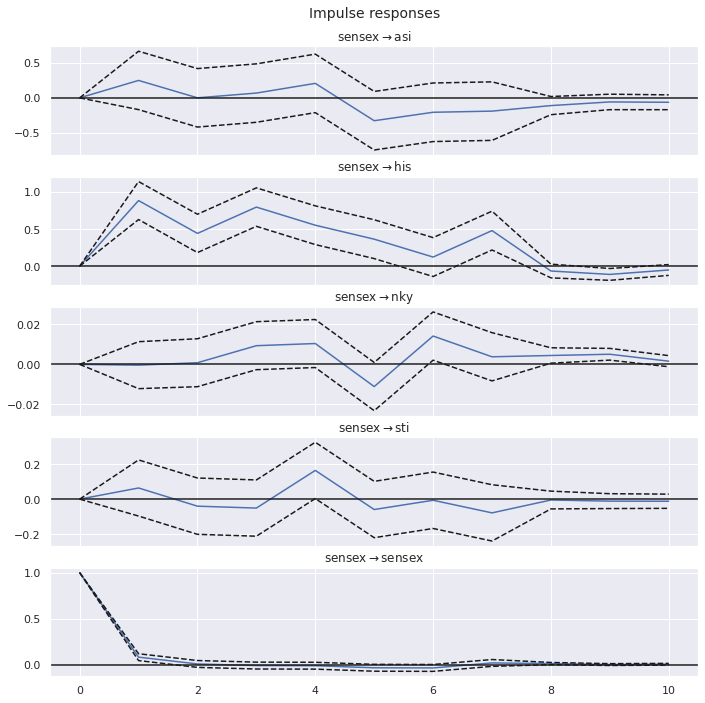

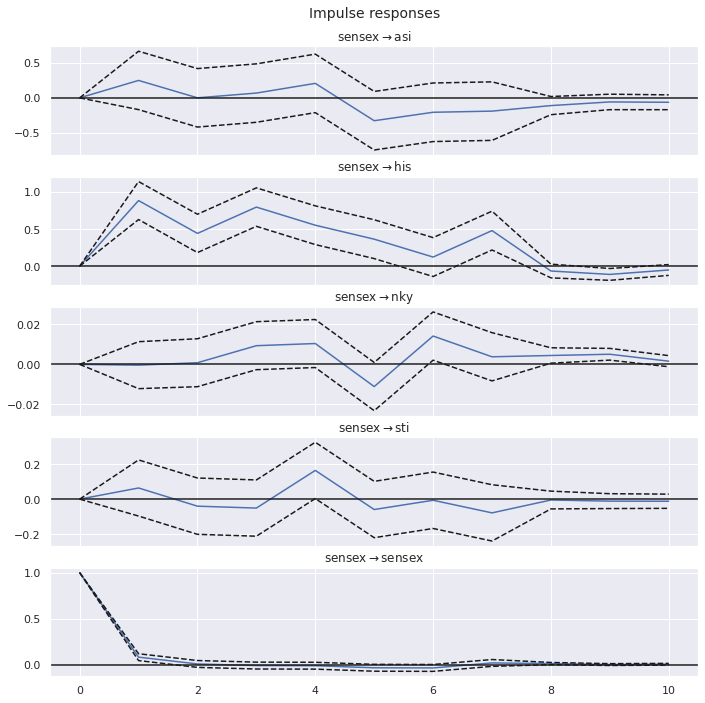

In [ ]:
irf.plot(impulse="sensex")

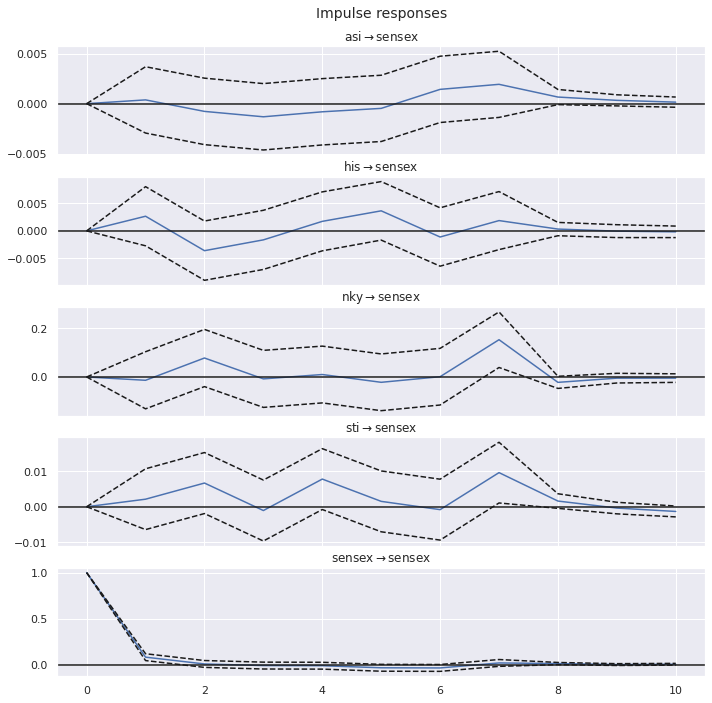

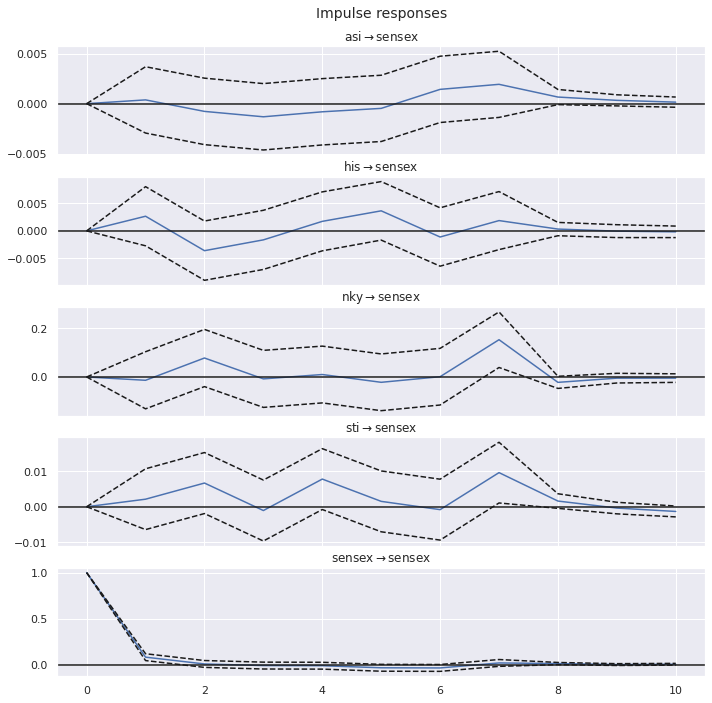

In [ ]:
irf.plot(response="sensex")

**Multivariate Granger Causality**

In [ ]:
causality_test = varresult.test_causality(["asi", "his", "sti"], ["sensex"], kind="f")
causality_test.summary()

Test statistic,Critical value,p-value,df
7.884,1.557,0.000,"(21, 13975)"


In [ ]:
causality_test1 = varresult.test_causality(["sensex", "his", "sti"], ["asi"], kind="f")
causality_test1.summary()

Test statistic,Critical value,p-value,df
1.574,1.557,0.046,"(21, 13975)"


In [ ]:
causality_test2 = varresult.test_causality(["sensex", "asi", "sti"], ["his"], kind="f")
causality_test2.summary()

Test statistic,Critical value,p-value,df
1.382,1.557,0.114,"(21, 13975)"


**Cointegration**

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
def cointegration_test(mydata, alpha = 0.05):
  output = coint_johansen(mydata, 1 ,2)
  d = {"0.90":0, "0.95":1, "0.99": 2}
  traces = output.lr1
  cvts = output.cvt[:, d[str(1-alpha)]]
  def adjust(val, length = 6): return str(val).ljust(length)
  print ("Name :: Test stst > c(95%)) => sinificant \n", "--"*20)
  for col, trace, cvt in zip(mydata.columns, traces, cvts):
    print(adjust(col), "::", adjust(round(trace,3),9), ">", adjust(cvt,8), "=>", trace > cvt)

In [ ]:
cointegration_test(mydata)

Name :: Test stst > c(95%)) => sinificant 
 ----------------------------------------
asi    :: 240.15    > 79.3422  => True
his    :: 112.752   > 55.2459  => True
nky    :: 40.229    > 35.0116  => True
sti    :: 21.342    > 18.3985  => True
sensex :: 5.296     > 3.8415   => True
